In [146]:
import pandas as pd
import numpy as np
from IPython.display import display
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
from matplotlib import cm
import math

%config InlineBackend.figure_formats = {'png', 'retina'}

In [118]:
# always display all columns in the dataframe 
pd.options.display.max_columns = None

In [119]:
#function for removing the commas from the database

def my_containsAny(str, set):
    for c in set:
        if c in str: return 1;
    return 0

def remove_commas(df):
    for column in df:
        index = -1
        for i in df[column]:
            index = index +  1
            if type(i) == str:
                #print("this is a string: " + i)
                if my_containsAny(i, ',') == 1:
                    #print("replacing the commas in this string: ", i)
                    i = i.replace(',', '')
                    #print("this no longer has commas: " + i)
                    i = float(i)
                    #print("this was a string but now it is a float: %f, " % (i) )
                    df[column][index] = i
                else: 
                    i = float(i)
                    df[column][index] = i
                    #print("this was a string  but now it is a float: %f" % (i) )
            else:
                print(i)
    return 
# print(df[column])

## Life Expectancy 

In [257]:
# life expectancy 
df_lifex = pd.read_csv('life_expectancy_1962.csv')
df_lifex.head()

,Contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Table15(c)- Life expectancy at birth1/ by sex ...,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year,Male,Female,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
# dropping all rows and columns without data 
df_lifex.dropna(axis = 0, how = 'all', inplace = True)
df_lifex.dropna(axis = 1, how = 'all', inplace = True)

df_lifex.drop(labels=[1, 3, 34, 35, 36, 37], inplace = True)
df_lifex.drop(labels=['Contents'], axis = 1, inplace = True)

# create a list to reset the index with 
lifex_years = [1962, 1972, 1982, 1990]
lifex_years = lifex_years + list(range(1991, 2016))

# rename the index and columns 
df_lifex = pd.DataFrame(df_lifex.values, index = lifex_years, columns = ['Male', 'Female'])



# remove commas and turn strings to floats 
remove_commas(df_lifex)
df_lifex = df_lifex.astype(float)

# export as python object
df_lifex.to_pickle('LifeExp.pkl')

df_lifex

,Male,Female
1962,58.70,62.00
1972,61.00,65.90
1982,64.38,71.69
1990,65.57,73.39
1991,66.15,73.89
1992,66.39,73.86
1993,66.44,73.95
1994,66.46,74.00
1995,66.56,74.28
1996,66.44,74.35


In [269]:
df_lifex.index

Int64Index([1962, 1972, 1982, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64')

In [267]:
male_list = []
for i in df_lifex['Male']:
 male_list.append(( i - df_lifex['Male'].iloc[0]) / df_lifex['Male'].iloc[0] * 100.0)
#male_list

In [268]:
female_list = []
for i in df_lifex['Female']:
 female_list.append(( i - df_lifex['Female'].iloc[0]) / df_lifex['Female'].iloc[0] * 100.0)
#female_list

In [271]:
df_lifex_per = pd.DataFrame({'Male_Per_Change': male_list,
                            'Female_Per_Change': female_list}, index = df_lifex.index )

,Male_Per_Change,Female_Per_Change
1962,0.000000,0.000000
1972,3.918228,6.290323
1982,9.676320,15.629032
1990,11.703578,18.370968
1991,12.691652,19.177419
1992,13.100511,19.129032
1993,13.185690,19.274194
1994,13.219761,19.354839
1995,13.390119,19.806452
1996,13.185690,19.919355


<function matplotlib.pyplot.show(*args, **kw)>

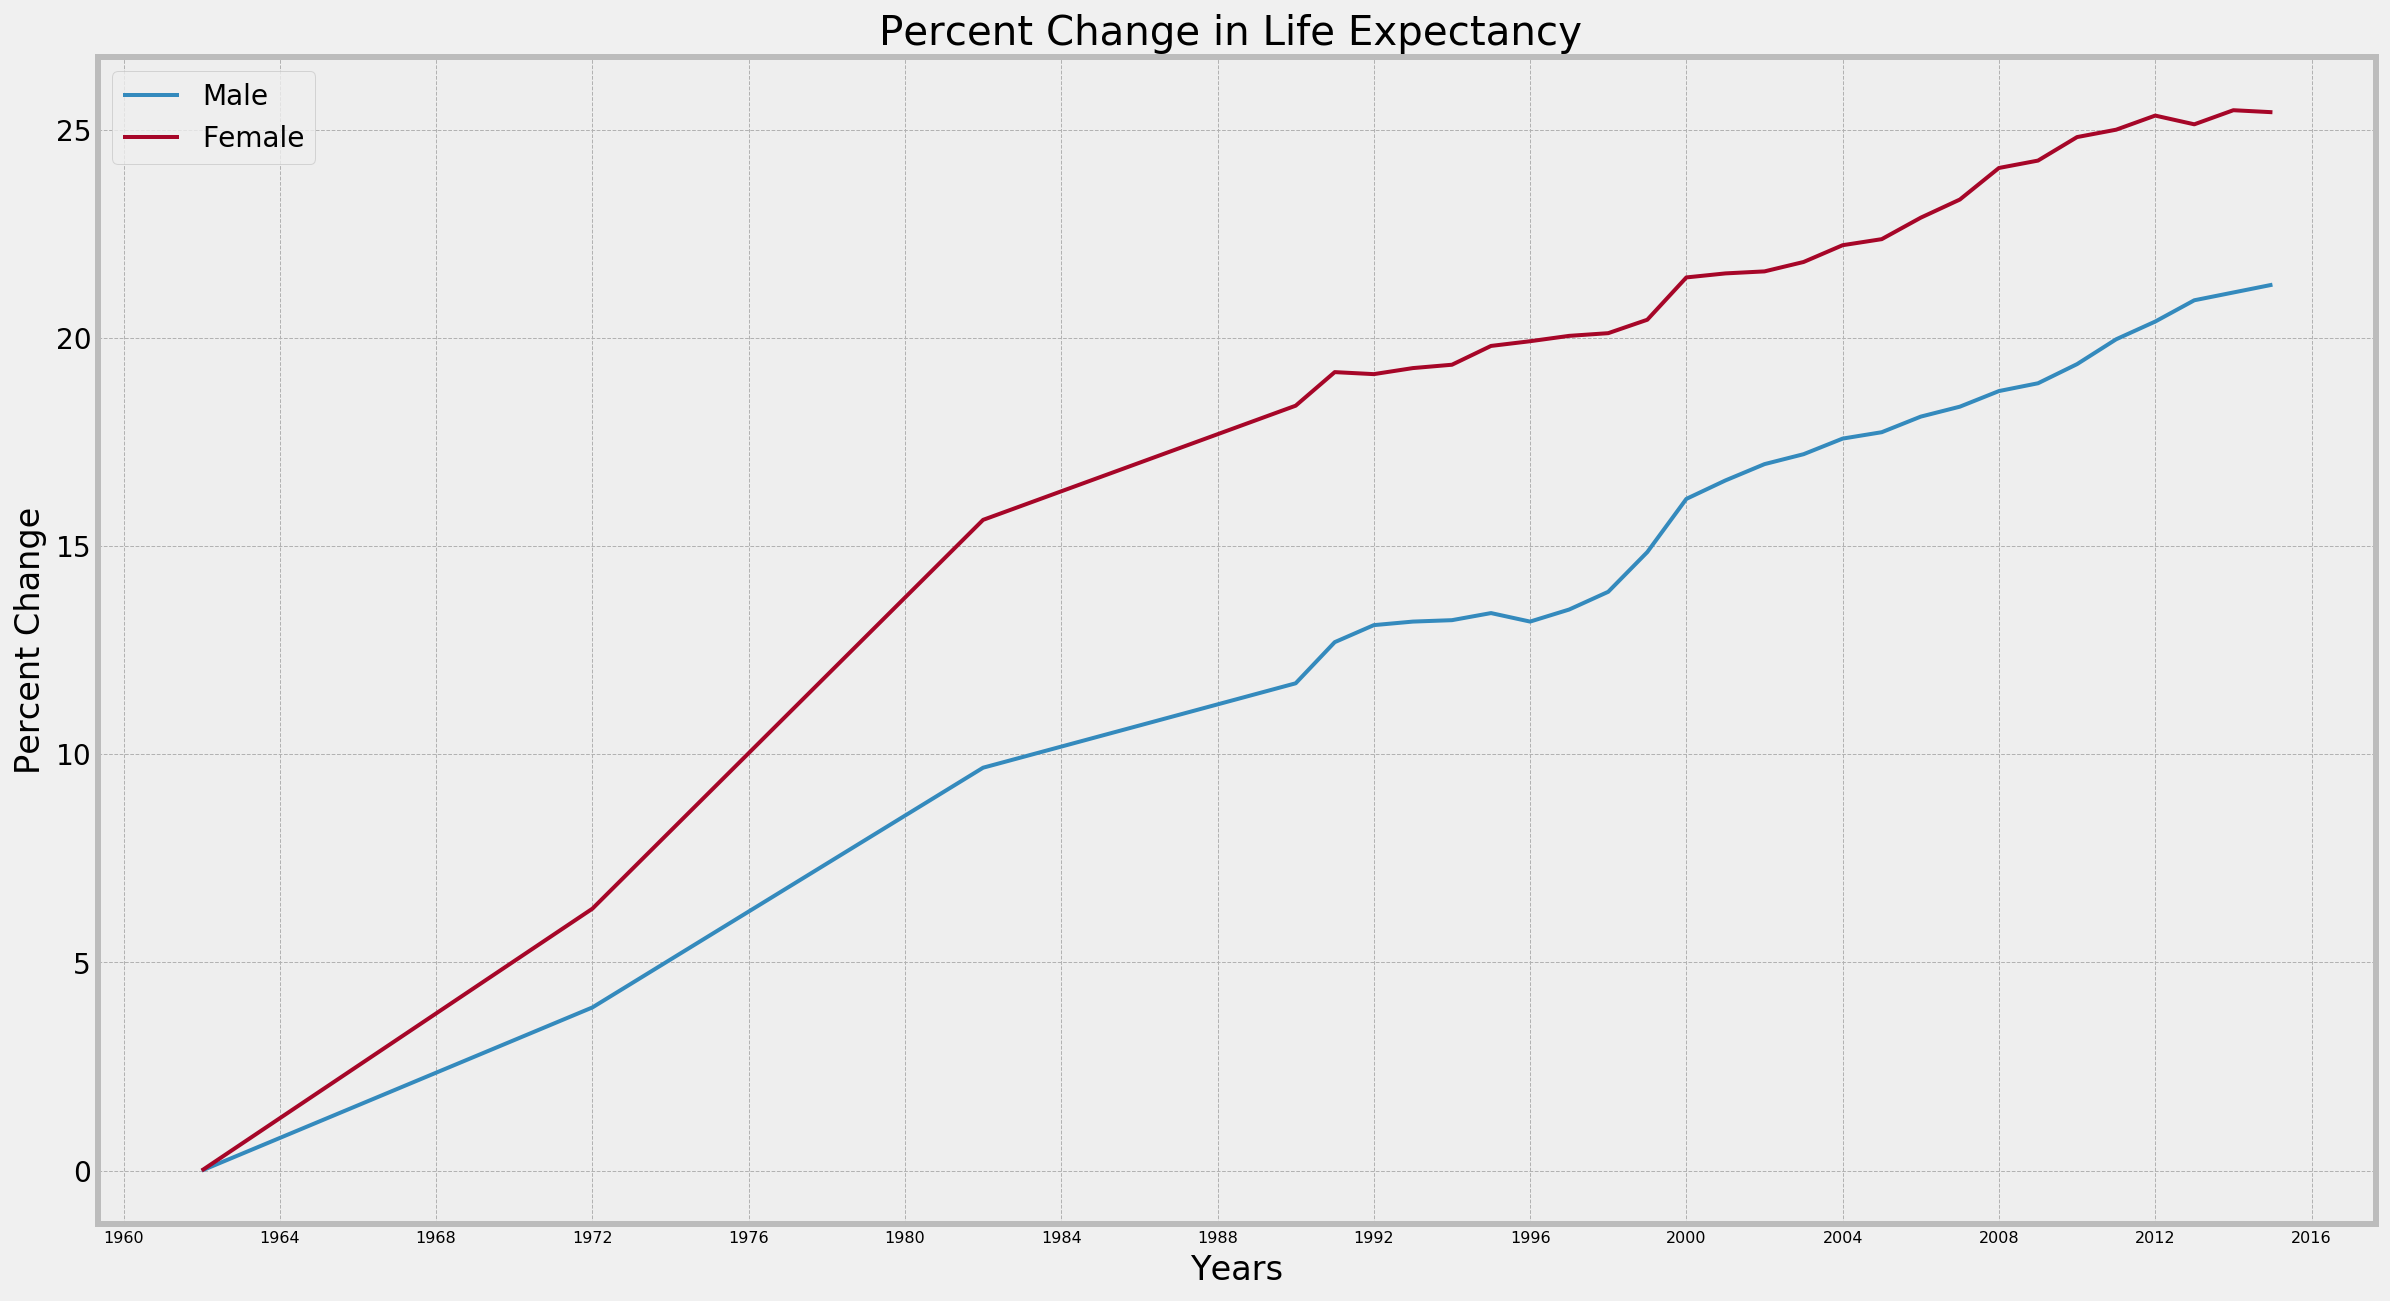

In [276]:
fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(16))

ax.tick_params(axis='x', labelsize=8)


plt.plot(df_lifex_per.index, df_lifex_per)


plt.legend(['Male','Female'])
plt.xlabel('Years')
plt.ylabel('Percent Change')
plt.title('Percent Change in Life Expectancy ')
plt.show

#### Male v Female Life Expectancy Growth Over Time 

Text(0.5,1,'Life Expectancy Growth Over Time')

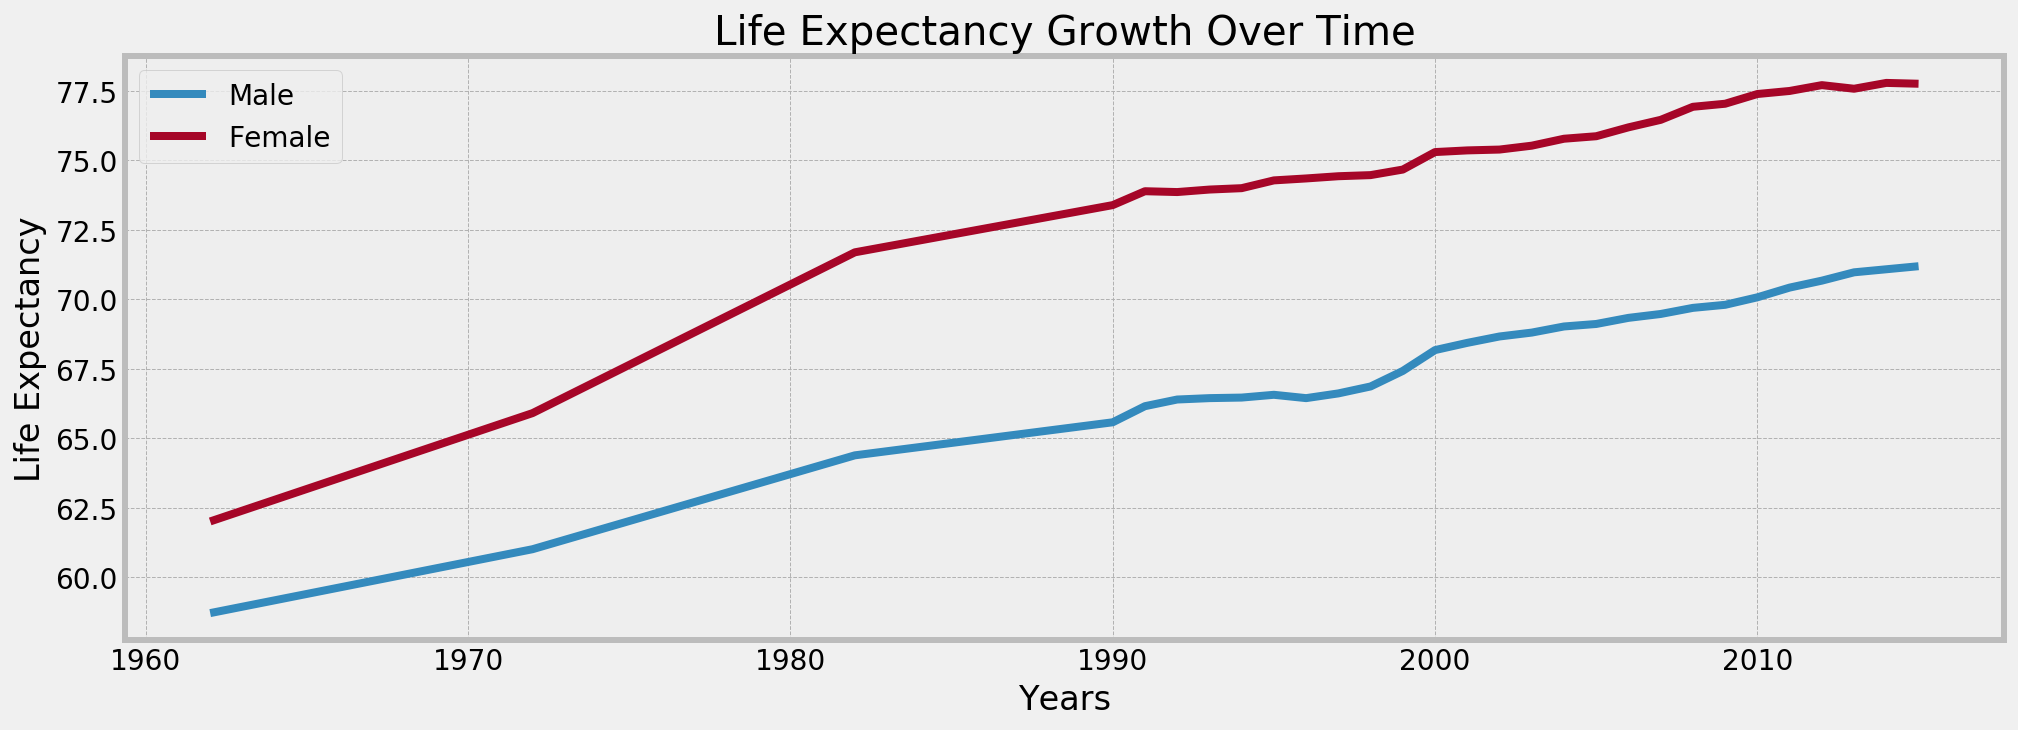

In [150]:

df_lifex.plot(linewidth=4, figsize=(15, 5))
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Growth Over Time')

## Demographics Over Time 

In [129]:
# demographics over time 
df_demog = pd.read_csv('demographics_age_sex_1998.csv')
df_demog.head()

,Contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
0,Table 18 (a)-Estimated resident population by ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Age group,1st July 1984,NaN,NaN,1st July 1985,NaN,NaN,1st July 1986,NaN,NaN,1st July 1987,NaN,NaN,1st July 1988,NaN,NaN,1st July 1989,NaN,NaN,1st July 1990,NaN,NaN,1st July 1991,NaN,NaN,1st July 1992,NaN,NaN,1st July 1993,NaN,NaN,1st July 1994,NaN,NaN,1st July 1995,NaN,NaN,1st July 1996,NaN,NaN,1st July 1997,NaN,NaN,1st July 1998,NaN,NaN,1st July 1999,NaN,NaN,1st July 2000,NaN,NaN,1st July 2001,NaN,NaN,1st July 2002,NaN,NaN,1st July 2003,NaN,NaN,1st July 2004,NaN,NaN,1st July 2005,NaN,NaN,1st July 2006,NaN,NaN,1st July 2007,NaN,NaN,1st July 2008,NaN,NaN,1st July 2009,NaN,NaN,1st July 2010,NaN,NaN,1st July 2011,NaN,NaN,1st July 2012,NaN,NaN,1st July 2013,NaN,NaN,1st July 2014,NaN,NaN,1st July 2015,NaN,NaN,1st July 2016,NaN,NaN
3,NaN,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes
4,0,"9,719","9,368","19,087","9,288","9,027","18,315","9,047","8,712","17,759","9,307","8,935","18,242","9,680","9,535","19,215","10,420","10,021","20,441","10,323","10,022","20,345","10,803","10,432","21,235","11,218","10,624","21,842","10,817","10,747","21,564","10,392","10,255","20,647","10,290","10,175","20,465","9,755","9,567","19,322","9,643","9,567","19,210","9,640","9,292","18,932","9,580","9,107","18,687","9,719","9,290","19,009","9,671","9,326"

In [130]:
# dropping all rows and columns without data 
df_demog.dropna(axis = 0, how = 'all', inplace = True)
df_demog.dropna(axis = 1, how = 'all', inplace = True)

df_demog.drop(labels=[0, 2, 3, 24, 25, 26, 27], inplace = True)

# reset the index
df_demog.set_index('Contents', inplace = True)
df_demog.index.rename('Age Group', inplace = True)

# remove commas and turn strings to floats 
remove_commas(df_demog)

In [278]:
# creating a new transposed matrix
df_demog_T = df_demog.transpose()

# creating lists for a new multi-level index 
years = list(range(1984,2017))
sexes = ['Male', 'Female', 'Both Sexes']
new_index = pd.MultiIndex.from_product([years, sexes], names = ['Years', 'Sexes'])

# creating a new dataframe with the new index
df_demogn = pd.DataFrame(df_demog_T.values, index = new_index, columns = list(df_demog_T.columns))

# save to csv
df_demogn.to_csv('Demographics.csv')
df_demogn.to_pickle('Demographics.pkl')

df_demogn.head()

0  1 - 4   5 - 9 10 - 14 15 - 19 20 - 24 25 - 29  \
Years Sexes                                                              
1984  Male         9719  45334   54756   48151   54919   54506   46605   
      Female       9368  43692   52484   46678   53987   53953   45671   
      Both Sexes  19087  89026  107240   94829  108906  108459   92276   
1985  Male         9288  42804   56458   48310   53751   55607   47586   
      Female       9027  40612   53959   46895   52013   54307   46990   

                 30 - 34 35 - 39 40 - 44 45 - 49 50 - 54 55 - 59 60 - 64  \
Years Sexes                                                                
1984  Male         40744   28032   21121   19411   16801   16940   12720   
      Female       39800   29441   22264   19403   16320   16695   13301   
      Both Sexes   80544   57473   43385   38814   33121   33635   26021   
1985  Male         40933   29662   22329   19992   17467   16797   14138   
      Female       40211   30401   23496   19683   16899   16411   14212   

                 65 - 69 70 - 74 75 - 79 80 - 84  85 + All ages  
Years Sexes                                                      
1984  Male          8645    5585    2846    1095   419   488349  
      Female        9721    7281    4495    2670  1556   488780  
      Both Sexes   18366   12866    7341    3765  1975   977129  
1985  Male          8477    5862    2799    1217   423   493900  
      Female        9725    7561    4527    2735  1646   491310

In [10]:
# index slice function
idx = pd.IndexSlice

# matrix that only looks at ages for both sexes
df_demogn_both = df_demogn.loc[idx['1984':'2016','Both Sexes'],:]

# matrix that also drops the 'all ages' column 
df_demogn_all = df_demogn_both.drop(labels = 'All ages', axis = 1)

df_demogn_all.head()


,,0,1 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 +
Years,Sexes,,,,,,,,,,,,,,,,,,,
1984,Both Sexes,19087,89026,107240,94829,108906,108459,92276,80544,57473,43385,38814,33121,33635,26021,18366,12866,7341,3765,1975
1985,Both Sexes,18315,83416,110417,95205,105764,109914,94576,81144,60063,45825,39675,34366,33208,28350,18202,13423,7326,3952,2069
1986,Both Sexes,17759,78141,113289,95247,100801,112085,94632,82667,68414,47725,38974,36159,31805,30243,18493,13631,7547,4098,2141
1987,Both Sexes,18242,74241,114271,98226,97121,109941,99116,85095,72452,49200,38482,38401,30860,30571,19361,14416,7400,4198,2200
1988,Both Sexes,19215,72466,111231,103746,93742,107363,102784,87261,75737,52359,40148,39362,31099,30310,20545,14831,7858,4053,2486


In [241]:
df_demogn_all.loc[1988, 'Both Sexes']

0           19215.0
1 - 4       72466.0
5 - 9      111231.0
10 - 14    103746.0
15 - 19     93742.0
20 - 24    107363.0
25 - 29    102784.0
30 - 34     87261.0
35 - 39     75737.0
40 - 44     52359.0
45 - 49     40148.0
50 - 54     39362.0
55 - 59     31099.0
60 - 64     30310.0
65 - 69     20545.0
70 - 74     14831.0
75 - 79      7858.0
80 - 84      4053.0
85 +         2486.0
Name: (1988, Both Sexes), dtype: float64

In [242]:
df_demogn_all.loc[1985, 'Both Sexes'] = df_demogn_all.loc[1985, 'Both Sexes'].astype(float)
df_demogn_all.loc[1985, 'Both Sexes'].describe()

count        19.000000
mean      51853.157895
std       38882.714756
min        2069.000000
25%       18258.500000
50%       39675.000000
75%       88996.000000
max      110417.000000
Name: (1985, Both Sexes), dtype: float64

#### Age Distribution Over Time 

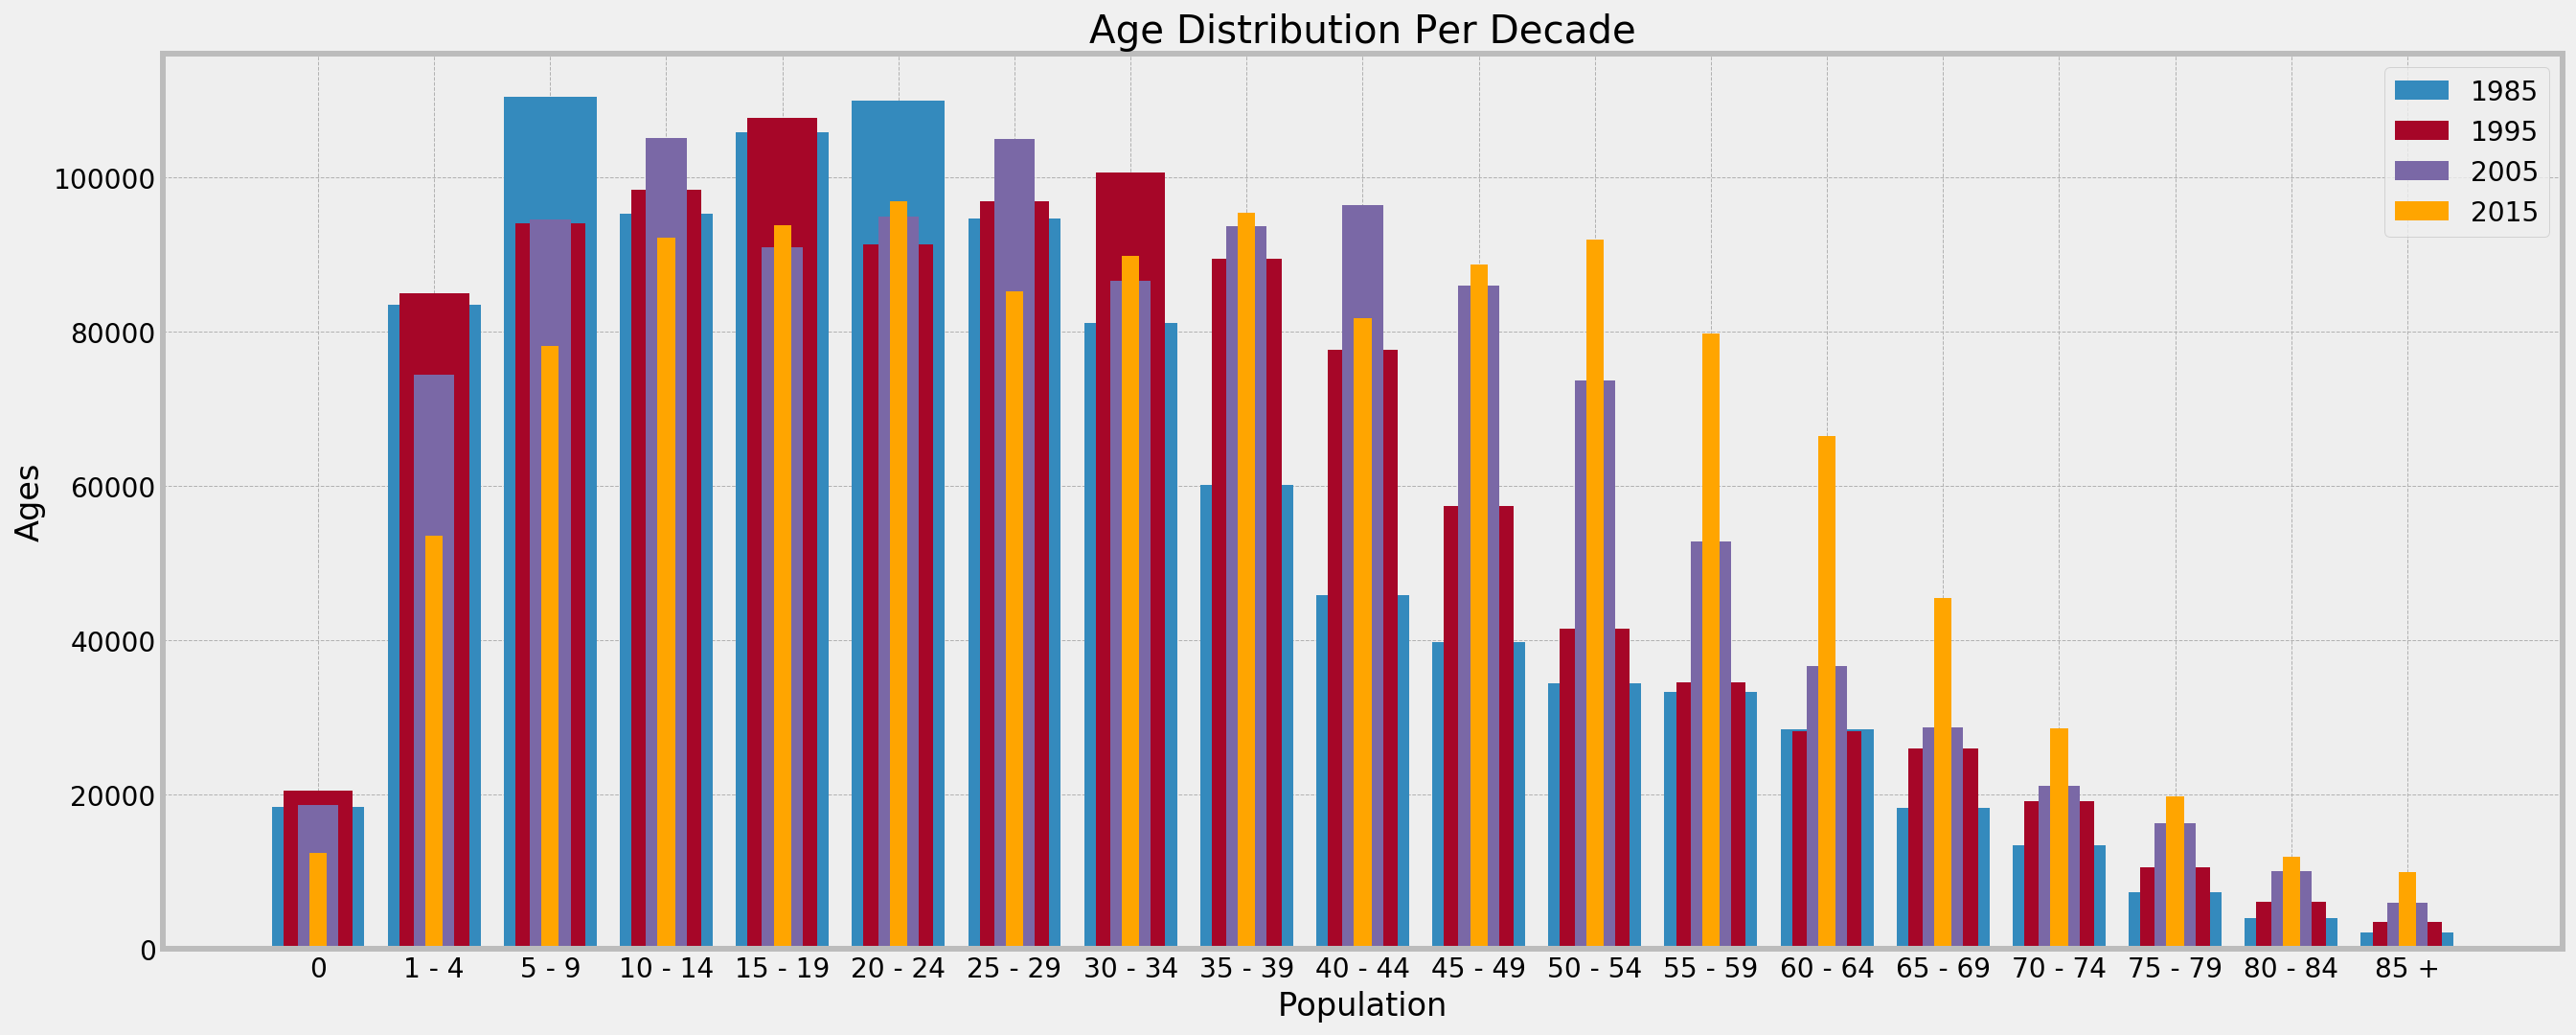

In [202]:
fig = plt.figure(figsize=(20,8))



plt.bar(df_demogn_all.columns, df_demogn_all.loc[1985, 'Both Sexes'], label = 1985, width = 0.8)
plt.bar(df_demogn_all.columns, df_demogn_all.loc[1995, 'Both Sexes'], label = 1995, width = 0.60)
plt.bar(df_demogn_all.columns, df_demogn_all.loc[2005, 'Both Sexes'], label = 2005, width = 0.35)
plt.bar(df_demogn_all.columns, df_demogn_all.loc[2015, 'Both Sexes'], label = 2015, width = 0.15, color = 'orange')


plt.ylabel('Ages')
plt.xlabel('Population')
plt.title('Age Distribution Per Decade')
plt.legend()

In [225]:
#list(new_index.get_level_values(0))

#### Population Growth Over Time

Text(0.5,1,'Population Growth Over Time')

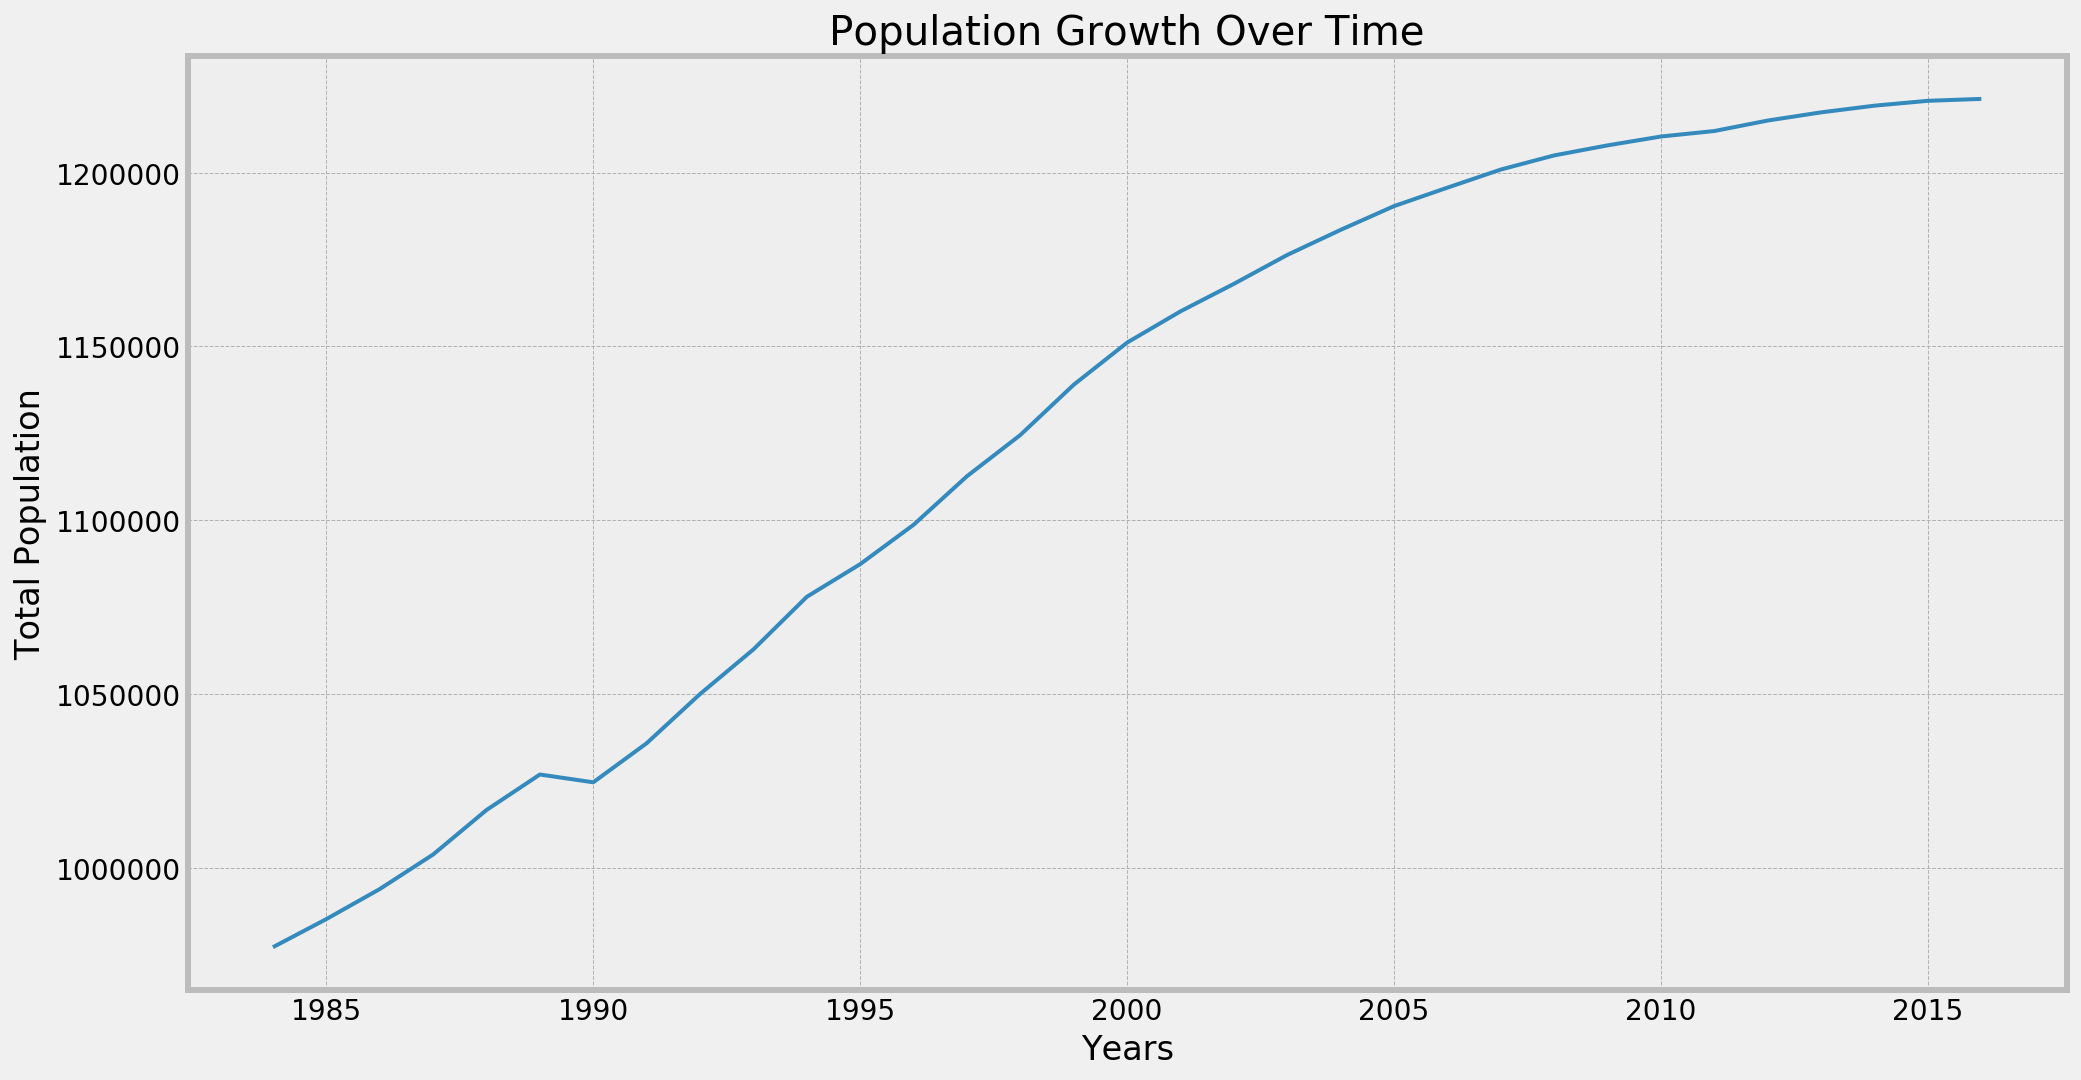

In [232]:
fig = plt.figure(figsize=(15,8))

x = list(range(1984,2017))
y = df_demogn_both['All ages']

plt.plot(x,y)
plt.xlabel('Years')
plt.ylabel('Total Population')
plt.title('Population Growth Over Time')


In [277]:
df_demogn_both.to_pickle('df_demogn_both.pkl')
df_demogn_all.to_pickle('df_demogn_all.pkl')
df_lifex.to_pickle('df_lifex.pkl')
df_lifex_per.to_pickle('df_lifex_per.pkl')